In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DGX', 'DIS', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY',
    'FLGT', 'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG',
    'JD', 'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NET', 'NOW', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU', 'RVLV', 'SAM',
    'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TMUS', 
    'TREX', 'TSCO', 'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL',
    'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AMEH', 'AMRK', 'APT', 'BRTX', 'BTTR', 'BYRN', 'CENN',
    'CHEF', 'COOP', 'CTGO', 'CVE', 'DQ', 'DTST',
    'DYAI', 'EP', 'ERIE', 'ESOA', 'FCUV', 'FKWL', 'FSI', 'GGE', 'GME',
    'HBM', 'HMY', 'HNRG', 'IDR', 'INTZ',  'KREF', 'MCVT', 'MICS',
    'MNMD', 'MOBQ', 'OMQS', 'PACB', 'PETV', 'POWW', 'PRPH',
    'RVP', 'RVYL', 'SOBR', 'VIRT', 'WAVD', 'WKHS', 'YORW', 'ZEST',
    'ZYXI']
BEST_WEIGHTED = [
    'ABST', 'AGI', 'CEF', 'CGAU', 'CZFS', 'DGX', 'FNV', 'GCBC', 'IEI',
    'IIM', 'LFMD', 'MHN', 'MIN', 'MIY', 'MMU', 'MTA', 'NAZ', 'NEN',
    'NPV', 'NUO']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2013-01-07', datetime.date(2023, 1, 7))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  156 of 156 completed
Generating derived columns...
AAPL... ABMD... ABNB... ABST... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BRTX... BTTR... BYND... BYRN... CEF... CENN... CGAU... CHEF... CHWY... COOP... CRWD... CTGO... CVE... CZFS... DDOG... DGX... DIS... DOCS... DOCU... DQ... DTST... DUOL... DYAI... EDIT... EP... ERIE... ESOA... ETSY... FCUV... FKWL... FLGT... FNV... FSI... FTNT... GCBC... GGE... GH... GME... GMED... GOOG... HBM... HMY... HNRG... IDR... IDXX... IEI... IIM... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MA... MASI... MCVT... MDB... MELI... MHN... MICS... MIN... MIY... MMU... MNMD... MNST... MOBQ... MSFT... MTA... MTCH... NAZ... NEN... NET... NOW... NPV... NUO... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RGEN... RIVN... 

In [5]:
data['Date'].tail()

2514   2022-12-30
2515   2023-01-03
2516   2023-01-04
2517   2023-01-05
2518   2023-01-06
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.996758
2       1.002656
3       1.007597
4       0.999952
5       0.999069
          ...   
2514    0.997459
2515    0.995999
2516    1.007539
2517    0.988354
2518    1.022841
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.004978
2,1.011408
3,1.009035
4,1.006133
5,1.002149
...,...
2514,1.006863
2515,1.017133
2516,1.038685
2517,1.003696


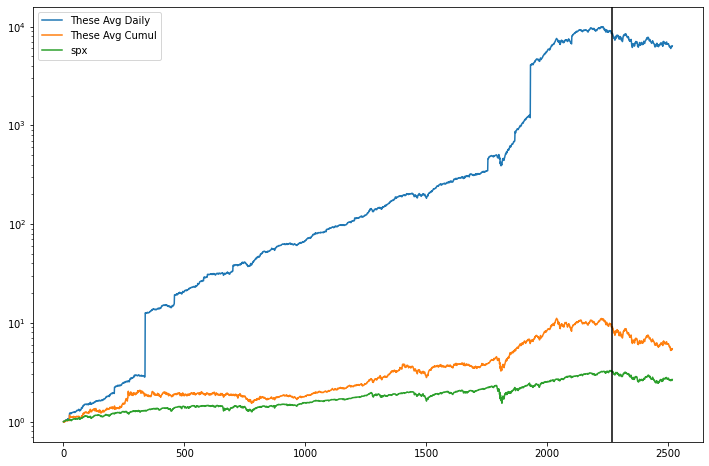

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2013-01-07,NaN,NaN
1,2013-01-08,0.990660,0.990660
2,2013-01-09,0.994988,0.995142
3,2013-01-10,1.006660,1.004623
4,2013-01-11,1.008229,1.005716


In [10]:
out.tail()

,Date,mine1,mine2
2514,2022-12-30,6202.547635,5.400945
2515,2023-01-03,6203.551779,5.335021
2516,2023-01-04,6317.966000,5.395604
2517,2023-01-05,6271.898113,5.334419
2518,2023-01-06,6366.274179,5.465768


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

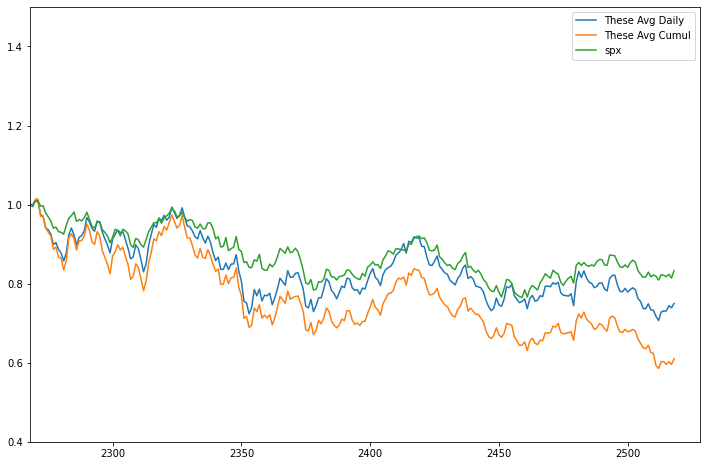

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2459,57.360001,57.360001,57.680000,55.459999,56.410000,4.049347,1.016841,0.997739,0.981214
2460,54.450001,54.450001,54.990002,51.389999,53.910000,3.997283,1.010017,0.949268,0.939854
2461,51.070000,51.070000,56.200001,50.790001,55.310001,3.933197,0.923341,0.937925,1.015794
2462,52.930000,52.930000,55.330002,52.200001,52.270000,3.968970,1.012627,1.036421,1.023497
2463,53.689999,53.689999,55.619999,53.040001,55.500000,3.983227,0.967387,1.014359,1.048555


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2459,57.360001,57.360001,57.680000,55.459999
2460,54.450001,54.450001,54.990002,51.389999
2461,51.070000,51.070000,56.200001,50.790001
2462,52.930000,52.930000,55.330002,52.200001
2463,53.689999,53.689999,55.619999,53.040001


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2459,57.360001,57.360001,57.680000,55.459999,54.990002,51.389999,0.958682,0.895920
2460,54.450001,54.450001,54.990002,51.389999,56.200001,50.790001,1.032140,0.932782
2461,51.070000,51.070000,56.200001,50.790001,55.330002,52.200001,1.083415,1.022127
2462,52.930000,52.930000,55.330002,52.200001,55.619999,53.040001,1.050822,1.002078
2463,53.689999,53.689999,55.619999,53.040001,52.430000,45.830002,0.976532,0.853604


0.05    0.977712
Name: HighMult, dtype: float64


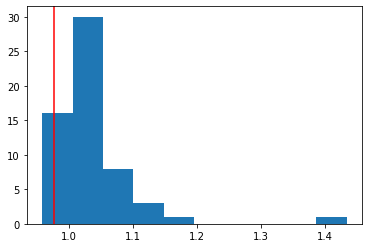

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0244355662861402


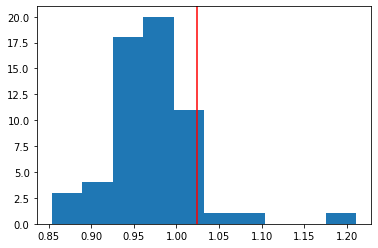

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0244355662861402, 0.9777122957569568)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0134334187512108, 0.9901463579599322)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2459,57.360001,57.360001,57.680000,55.459999,54.990002,51.389999,0.958682,0.895920,0
2460,54.450001,54.450001,54.990002,51.389999,56.200001,50.790001,1.032140,0.932782,0
2461,51.070000,51.070000,56.200001,50.790001,55.330002,52.200001,1.083415,1.022127,0
2462,52.930000,52.930000,55.330002,52.200001,55.619999,53.040001,1.050822,1.002078,0
2463,53.689999,53.689999,55.619999,53.040001,52.430000,45.830002,0.976532,0.853604,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.007027504039457, 0.9858355047651641, 1.057531356194776, 0.9748541416033298)

In [27]:
get_hilo_mults(aapl)

(1.0013902122221432,
 0.9910786457460428,
 1.0134958130362035,
 0.9901265185536146)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.001390,0.991079,1.013496,0.990127
1,ABMD,1.002395,0.997807,1.005272,1.000000
2,ABNB,0.992671,0.991127,1.013518,0.984558
3,ABST,0.997209,0.998995,1.004240,0.995069
4,ACN,1.002958,0.991997,1.009515,0.989098


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,129.619995,AAPL
ABMD,NaN,ABMD
ABNB,88.519997,ABNB
ABST,11.11,ABST
ACN,269.209991,ACN
...,...,...
ZM,69.510002,ZM
ZYXI,15.65,ZYXI
^GSPC,3895.080078,^GSPC
^IXIC,10569.293945,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.001390,0.991079,1.013496,0.990127,129.619995
1,ABMD,1.002395,0.997807,1.005272,1.000000,NaN
2,ABNB,0.992671,0.991127,1.013518,0.984558,88.519997
3,ABST,0.997209,0.998995,1.004240,0.995069,11.11
4,ACN,1.002958,0.991997,1.009515,0.989098,269.209991


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv